
# Basic case: complete mixing

In [3]:
import agentpy as ap
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulación del caso well mixed 

In [4]:
class Person(ap.Agent):

    def setup(self): #aqui inicializamos las variables de agentes nuevas cuando se crean los agentes
       

        self.opinion = random.uniform(0,1)
        self.uncertainty = parameters['d']
        self.new_opinion = self.opinion # Used for synchronous updating

    def opinion_influence(self): #este agente es el que influencia a otros en la poblacion
       

        #aleatoriamente seleccionamos un numero fijo de agentes como compañeros a influenciar(interacciones)
        #en el modelo de Deffuant cada uno de las interacciones se realizan a parejas, interacciones 1 a 1.
        
        partners = self.model.pop.random(self.p.num_partners, replace=False)
        for partner in partners:
            opinion_diff = abs(self.opinion - partner.opinion)
            if opinion_diff <= self.uncertainty:
                opinion_change = self.p.mu * (self.opinion - partner.opinion)
                partner.new_opinion = partner.opinion + opinion_change

    def update_opinion(self): #actualizamos las opiniones en cada uno de los pasos
        

        self.opinion = self.new_opinion

In [5]:
class OpinionModel(ap.Model):
#para esto hay que saber como funciona bien las listas de agentes.
#pop
    def setup(self): #inicializamos el modelo y configuramos a la poblacion de agentes
        
        
        # creamos la poblacion de agentes
        self.pop = ap.AgentList(self, self.p.pop_size, Person)

    def update(self):#llamamos despues de cada set up y en cada paso
        

        # Synchronous updating of opinions
        self.pop.update_opinion()
        # Record stats
        self.pop.record("opinion")

    def step(self):#eventos del modelo cada paso temporal
        

        self.pop.select(self.pop.random()).opinion_influence()

    def end(self):#condiciones al terminar
        
        return

In [6]:
parameters = {
    'pop_size': 300,
    'steps': 700,
    'num_partners': 1,
    'mu': 0.05,
    'd':0.1,
    'min_percen':5}

In [7]:
model = OpinionModel(parameters)
results = model.run()

Completed: 402 steps

Completed: 700 steps
Run time: 0:00:00.667672
Simulation finished


Representamos opinion frente a tiempo para ver los clusters de opinion

In [8]:
# Get all logged data for Person agents
#cogemos todo datos loged para cada agente persona
results = results.variables.Person
# Convert the resulting Pandas series to a dataFrame
#convertimos a un dataframe
results = results.opinion.to_frame().reset_index()

In [9]:
results_df2=pd.DataFrame(results)

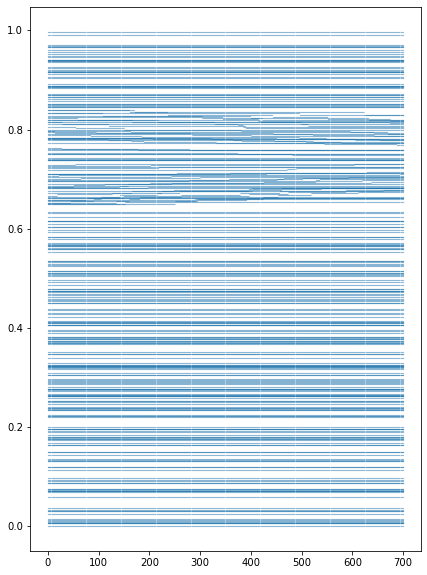

In [10]:
#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
plt.figure(figsize=(7,10))
plt.scatter(results_df2['t'],results_df2['opinion'], s=0.01)

        Aquí podemos ver que a veces nuestro metodo esta contando clusters de una particula por lo que podriamos estar generando un bias en la distribucion final de clusters frente a d... MIRAR LISTA ABAJO

In [11]:
val=results_df2[results_df2['t'] == parameters['steps']]['opinion']
a = []
#calculamos el numero de clusters que hay y el numero de particulas en cada uno

rounded = [round(x,2) for x in val]
uniques = list(set(rounded))

data = {}
for x in uniques:
    data[x] = rounded.count(x)
#data=pd.DataFrame(data)   

data2 = pd.DataFrame([[key, data[key]] for key in data.keys()], columns=['cluster_opinion', 'Amount_particles'])
data3=data2[data2['Amount_particles']>parameters['min_percen']*parameters['pop_size']/100]
valors_2=len(data3)
valors_3=len(data2)

print('numero de clusters una vez filtrado:',valors_2)
print('numero de clusters sin filtrar',valors_3)
print(data3)

numero de clusters una vez filtrado: 0
numero de clusters sin filtrar 95
Empty DataFrame
Columns: [cluster_opinion, Amount_particles]
Index: []


# statistics of opinion clusters as a function of 'd'

fijamos \mu=0.5 y N=1000 y hacemos 250 muestras para ver como se reparten los clusters en funcion de 'd'

In [12]:
#primero dividimos el espacio de parametro threshold d en n 

In [13]:
lista =pd.DataFrame()
#esto es para coger el valor de la lista facilmente
lista['indice']= None
lista['th']=None
 #donde empieza el bucle x_0
x=0.06


i=0
n=100  #numero de cachitos al separar el bucle de threshold d de 0 a 0,5
j=0.5   #donde acaba el bucle

while x<=j :
    
    lista = lista.append({'th': x,'indice':int(i)}, ignore_index=True)
    i=i+1
    x+=(j)/(n+1)

#invertimos la lista por si hay errores en valores cercanos a cero donde no hay clusters y estan equidistribuidas

newList=[]
newList =lista.iloc[::-1]

#len(newList)
lista['indice']=lista['indice']+1
lista


,indice,th
0,1.0,0.060000
1,2.0,0.064950
2,3.0,0.069901
3,4.0,0.074851
4,5.0,0.079802
...,...,...
84,85.0,0.475842
85,86.0,0.480792
86,87.0,0.485743
87,88.0,0.490693


In [14]:
#ahora ejecutamos el programa y contamos cuantos clusters hay al final de cada uno para representarlos 
valors_2=0
resultados=pd.DataFrame()#inicializamos el dataframe de resultados de cuenta de clusters, sample, threshold
resultados['clusters']= None
resultados['d']=None
resultados['sample']=None

dispersion=pd.DataFrame()#inicializamos dataframe de dispersion, cuenta de numero de clusters, threshold
dispersion['dispersion_index']=None
dispersion['d']=None


l=0
i=0
numer_samples=int(250)#numero de samples en cada uno de los intervalos de d
cuenta=0
#resultados
    

In [15]:
for i in newList['th']:
    cuenta = int(lista[lista['th']== i]['indice']) #para contar por donde vamos del bucle
    disp_1 = 0 #dispersion index denominator
    disp_2 = 0 #dispersion index numerator
    for l in range( 1, numer_samples):

        parameters = {
            'pop_size': 300,
            'steps': 700,
            'num_partners': 1,
            'mu': 0.5,
            'd':i,
            'min_percen': 7}


        model = OpinionModel(parameters)
        results2 = model.run()

        """obtenemos el resultado del modelo en cada una de las key(th) x sample iteracciones"""
        
        # Get all logged data for Person agents
        results2 = results2.variables.Person
        # Convert the resulting Pandas series to a dataFrame
        results2 = results2.opinion.to_frame().reset_index()
        results_df=pd.DataFrame(results2)
        
        #imprimimos el porcentaje del bucle para saber como vamos 
        
        print("\033[4;35m"+str(l*cuenta/(len(lista)*numer_samples)) + '% completado'+'\033[0;m')

        
        """seleccionamos solo los del ultimo paso para contar los clusters"""

        #para ver el numero de clusters comparamos los resultados del ultimo paso del programa
        valors=results_df[results_df['t'] == parameters['steps']]['opinion']
        
        """obtenemos el numero de clusters y el numero de agentes en cada uno"""
       
        #calculamos el numero de clusters que hay y el numero de particulas en cada uno
        #redondeando al segundo decimal y guardamos el numero de agentes en cada cluster
        rounded = [round(x,2) for x in valors]
        uniques = list(set(rounded))

        data = {}
        for x in uniques:
            data[x] = rounded.count(x) 
        #convertimos a dataframe
        data2 = pd.DataFrame([[key, data[key]] for key in data.keys()], columns=['cluster_opinion', 'Amount_particles'])

        #cogemos solo las cuentas de los que son mayores de min_count
        
        data2=data2[data2['Amount_particles']>parameters['min_percen']*parameters['pop_size']/100]
        valors_2=len(data2)
        
        
        """hacemos un bucle para ir sumando todas las cantidades de particulas de los clusters para calcula dispersion"""
        
        for j in data2['Amount_particles']:
            disp_1 = disp_1+(j)**2
            disp_2 = disp_2+(j)
        
        
        resultados =  resultados.append({'clusters': valors_2, 'd': i, 'sample':l}, ignore_index=True)
        
     
    dispersion = dispersion.append({'dispersion_index': l*disp_1/(disp_2)**2, 'd':i}, ignore_index=True)
    

Completed: 700 steps
Run time: 0:00:00.621378
Simulation finished
0.004% completado
Completed: 700 steps
Run time: 0:00:00.623340
Simulation finished
0.008% completado
Completed: 700 steps
Run time: 0:00:00.677190
Simulation finished
0.012% completado
Completed: 700 steps
Run time: 0:00:00.673202
Simulation finished
0.016% completado
Completed: 700 steps
Run time: 0:00:00.610400
Simulation finished
0.02% completado
Completed: 700 steps
Run time: 0:00:00.633529
Simulation finished
0.024% completado
Completed: 700 steps
Run time: 0:00:00.670236
Simulation finished
0.028% completado
Completed: 700 steps
Run time: 0:00:00.649233
Simulation finished
0.032% completado
Completed: 700 steps
Run time: 0:00:00.610366
Simulation finished
0.036% completado
Completed: 700 steps
Run time: 0:00:00.628320
Simulation finished
0.04% completado
Completed: 517 steps

KeyboardInterrupt: 

In [ ]:
#ahora representamos cada uno de los tipos de clusters
final_dat_1=pd.DataFrame()
final_dat_1['contar_clusters']= None
final_dat_1['d']=None
clusters=pd.DataFrame()


final_dat_2=pd.DataFrame()
final_dat_2['contar_clusters']= None
final_dat_2['d']=None



final_dat_3=pd.DataFrame()
final_dat_3['contar_clusters']= None
final_dat_3['d']=None



final_dat_4=pd.DataFrame()
final_dat_4['contar_clusters']= None
final_dat_4['d']=None



final_dat_5=pd.DataFrame()
final_dat_5['contar_clusters']= None
final_dat_5['d']=None



final_dat_6=pd.DataFrame()
final_dat_6['contar_clusters']= None
final_dat_6['d']=None



final_dat_7=pd.DataFrame()
final_dat_7['contar_clusters']= None
final_dat_7['d']=None


# representamos por separado cada uno dependiendo del numero de clusters formados

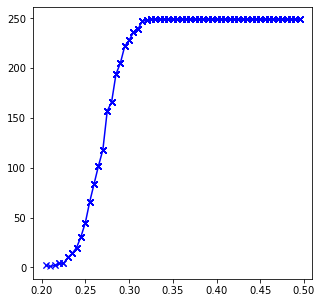

In [957]:
cluster_1=resultados[resultados['clusters'] == 1]
for i in cluster_1['d']:
    clusters = cluster_1[cluster_1['d']== i]
    numero_clus = len(clusters)
    #print(clusters)
    final_dat_1 =  final_dat_1.append({'contar_clusters': numero_clus, 'd': i}, ignore_index=True)
#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
final_dat_1=final_dat_1.sort_values('d')
plt.figure(figsize=(5,5))
plt.plot(final_dat_1['d'],final_dat_1['contar_clusters'],'xb-')


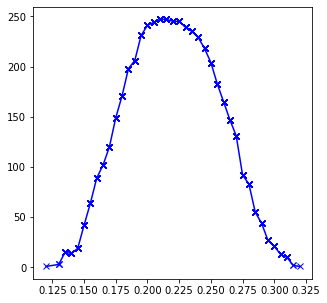

In [958]:
cluster_2 = resultados[resultados['clusters'] == 2]
for i in cluster_2['d']:
    clusters = cluster_2[cluster_2['d']== i]
    numero_clus = len(clusters)
    final_dat_2 =  final_dat_2.append({'contar_clusters': numero_clus, 'd': i}, ignore_index=True)
    
#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
final_dat_2=final_dat_2.sort_values('d')

plt.figure(figsize=(5,5))
plt.plot(final_dat_2['d'],final_dat_2['contar_clusters'],'xb-')
#cluster_2

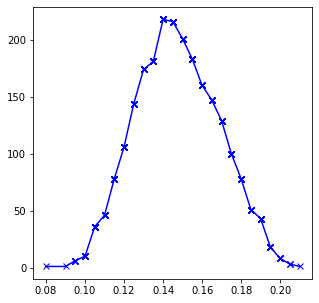

In [959]:
cluster_3=resultados[resultados['clusters'] == 3]
for i in cluster_3['d']:
    clusters=cluster_3[cluster_3['d']== i]
    numero_clus = len(clusters)
    final_dat_3 =  final_dat_3.append({'contar_clusters': numero_clus, 'd': i}, ignore_index=True)
    
#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
final_dat_3=final_dat_3.sort_values('d')

plt.figure(figsize=(5,5))
plt.plot(final_dat_3['d'],final_dat_3['contar_clusters'],'xb-')


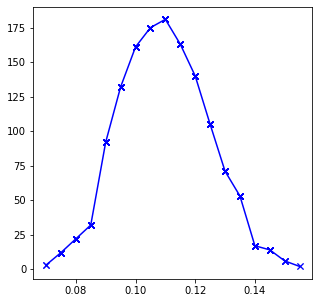

In [960]:
cluster_4=resultados[resultados['clusters'] == 4]
for i in cluster_4['d']:
    clusters=cluster_4[cluster_4['d']== i]
    numero_clus = len(clusters)
    final_dat_4 =  final_dat_4.append({'contar_clusters': numero_clus, 'd': i}, ignore_index=True)
    
#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
final_dat_4 = final_dat_4.sort_values('d')

plt.figure(figsize=(5,5))
plt.plot(final_dat_4['d'],final_dat_4['contar_clusters'],'xb-')


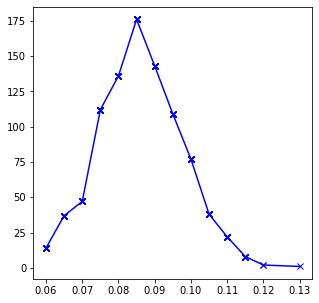

In [961]:
cluster_5=resultados[resultados['clusters'] == 5]
for i in cluster_5['d']:
    clusters=cluster_5[cluster_5['d']== i]
    numero_clus = len(clusters)
    final_dat_5 =  final_dat_5.append({'contar_clusters': numero_clus, 'd': i}, ignore_index=True)
    
#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
final_dat_5=final_dat_5.sort_values('d')

plt.figure(figsize=(5,5))
plt.plot(final_dat_5['d'],final_dat_5['contar_clusters'],'xb-')


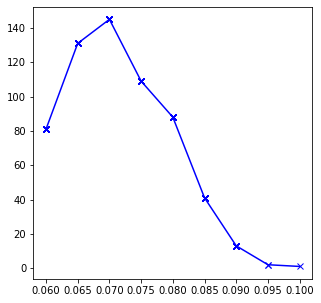

In [962]:
cluster_6=resultados[resultados['clusters'] == 6]
for i in cluster_6['d']:
    clusters = cluster_6[cluster_6['d']== i]
    numero_clus = len(clusters)
    final_dat_6 =  final_dat_6.append({'contar_clusters': numero_clus, 'd': i}, ignore_index=True)
    
#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
final_dat_6=final_dat_6.sort_values('d')
plt.figure(figsize=(5,5))
plt.plot(final_dat_6['d'],final_dat_6['contar_clusters'],'xb-')


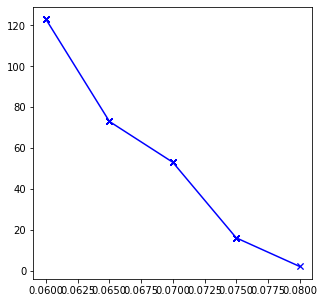

In [963]:
cluster_7=resultados[resultados['clusters'] == 7]
for i in cluster_7['d']:
    clusters=cluster_7[cluster_7['d']== i]
    numero_clus = len(clusters)
    final_dat_7 =  final_dat_7.append({'contar_clusters': numero_clus, 'd': i}, ignore_index=True)
    
#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
final_dat_7=final_dat_7.sort_values('d')

plt.figure(figsize=(5,5))
plt.plot(final_dat_7['d'],final_dat_7['contar_clusters'],'xb-')


C:\Users\BrunoM\AppData\Local\Temp/ipykernel_19836/1287356801.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "xb-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(final_dat_1['d'],final_dat_1['contar_clusters'], 'xb-',label='1 peaks',color='red')
C:\Users\BrunoM\AppData\Local\Temp/ipykernel_19836/1287356801.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "xb-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(final_dat_2['d'],final_dat_2['contar_clusters'], 'xb-',label='2 peaks',color='green')
C:\Users\BrunoM\AppData\Local\Temp/ipykernel_19836/1287356801.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "xb-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(final_dat_3['d'],final_dat_3['contar_clusters'], 'xb-',label='3 peaks',color='blue')
C:\Users\BrunoM\AppData\Local\Temp

Text(0, 0.5, 'number of samples')

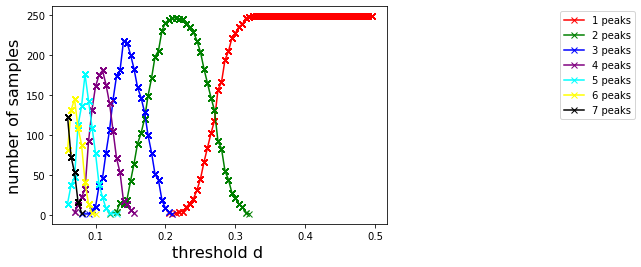

In [966]:
plt.plot(final_dat_1['d'],final_dat_1['contar_clusters'], 'xb-',label='1 peaks',color='red')
plt.plot(final_dat_2['d'],final_dat_2['contar_clusters'], 'xb-',label='2 peaks',color='green')
plt.plot(final_dat_3['d'],final_dat_3['contar_clusters'], 'xb-',label='3 peaks',color='blue')
plt.plot(final_dat_4['d'],final_dat_4['contar_clusters'], 'xb-',label='4 peaks',color='purple')
plt.plot(final_dat_5['d'],final_dat_5['contar_clusters'], 'xb-',label='5 peaks',color='cyan')
plt.plot(final_dat_6['d'],final_dat_6['contar_clusters'], 'xb-',label='6 peaks',color='yellow')
plt.plot(final_dat_7['d'],final_dat_7['contar_clusters'], 'xb-',label='7 peaks',color='black')


#plt.show() final plot including all of the clusters distribution
plt.legend(bbox_to_anchor=(1.5, 1.0), loc='upper left')
plt.xlabel("threshold d ", size = 16)
plt.ylabel("number of samples", size = 16)



# clustering and transitions

Text(0, 0.5, 'dispersion index')

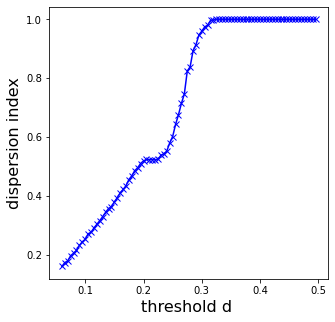

In [965]:
dispersion=pd.DataFrame(dispersion)

#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
dispersion=dispersion.sort_values('d')
plt.figure(figsize=(5,5))
plt.plot(dispersion['d'],dispersion['dispersion_index'],'xb-')

#plt.show()#final plot including all of the clusters distribution
plt.xlabel("threshold d ", size = 16)
plt.ylabel("dispersion index", size = 16)




In [27]:
# Guarda datos en CSV:
dispersion.to_csv('dispersion_well_mixed.csv', header=False, index=False)

NameError: name 'dispersion' is not defined

# Scale free network topology and opinion updating

In [31]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Barabási-Albert Model is a scale-free model that follows power-law distribution. It is derived from the preferential attachment of Price's Model. The most distinctive feature of the model is the first-mover advantage. The earliest vertices obtain more edges than the later ones simply because more degrees attract more vertices to get attached.

in a barabási albert model all vertices should suffice the minimum degree that is not the case in networkx, you may encounter some vertices that violate the minimum degree, so we could create a fully connected graph for first comers. First comers would be guaranteed to have the minimum degree.


for now wer will use networkx nevertheless.

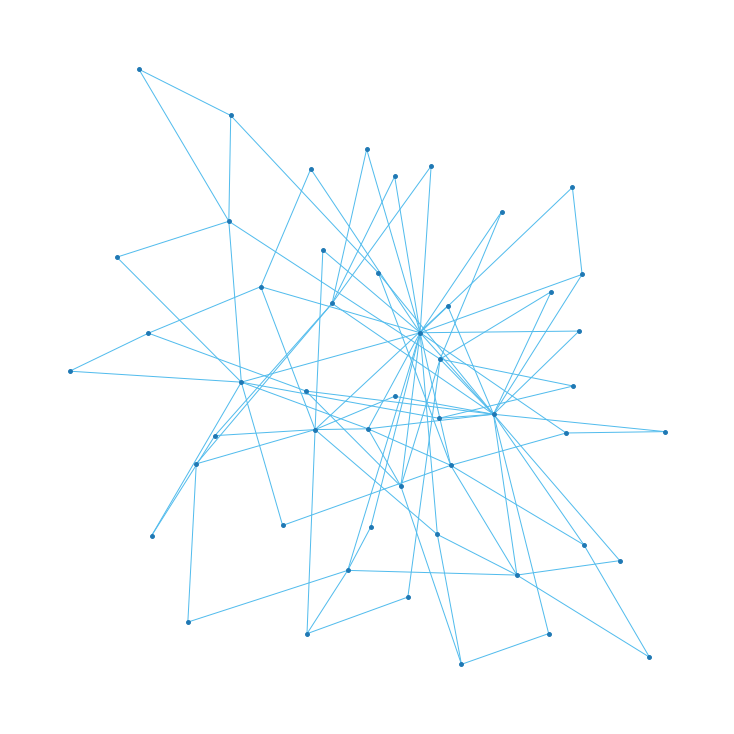

In [90]:
#in networkx we have to have 
G=nx.barabasi_albert_graph(50,2)

"""(n=numer of nodes, m=number of new nodes each with m edges, preferentially attached to existing nodes with high degree)"""
plt.figure(figsize=(10,10))

nx.draw(G,with_labels=False,node_size=15, edge_color="#52bced")
plt.show()

In [74]:
#nx.average_neighbor_degree(G, source="in", target="in")
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
dmax

233

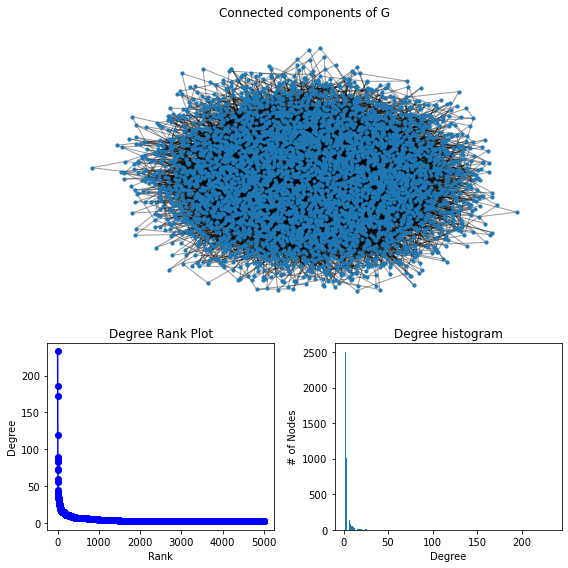

In [65]:

#G = nx.barabasi_albert_graph(900, 2)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a B-A graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=10)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [66]:
def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 5, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 5, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

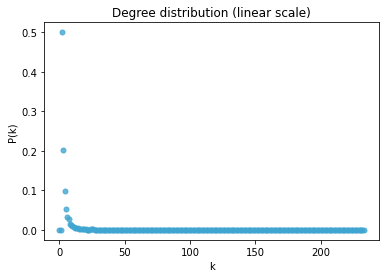

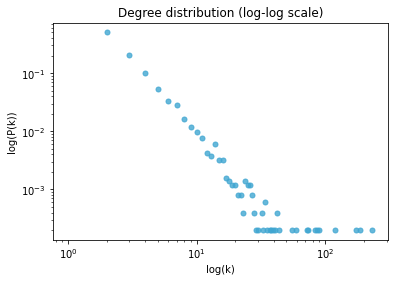

(None, None)

In [67]:
k_distrib(G), k_distrib(G, scale = 'log', fit_line = False)


In [11]:
import winsound


In [12]:

print("Playing the file 'Welcome.wav'")
# winsound.PlaySound('filename', flag)

winsound.PlaySound('SystemExit', winsound.SND_FILENAME)

Playing the file 'Welcome.wav'


In [13]:
# importing the pyttsx library
import pyttsx3

# initialisation
engine = pyttsx3.init()

# testing

engine.say("La simulación ha terminado")
engine.say("Por fin")


engine.runAndWait()
